# Juan Manuel López Vega
## Mecánica Analítica
***Tarea 2***

In [1]:
#Librerias usadas
from matplotlib import pyplot as plt
from math import *
import numpy as np
from scipy.integrate import odeint

## El péndulo forzado amortiguado

La ecuación del péndulo forzado es:

Aceleración+Amortiguamiento+Gravedad=Fuerza externa.

La ecuación se ve de la siguiente manera:

\begin{equation}
\ddot{\theta}+\mu\dot{\theta}+\omega_{0}^{2}\sin(\theta)=A\cos(\omega_{d})
\end{equation}


#### 1.-Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función coseno con una cierta amplitud y fase dada en términos de los parámetros de la ecuación anterior. Considerando A=1, $\omega_{0}$=1 y $\mu$=0.05:

a) Teniendo en cuenta que la amplitud para la solución particular al oscilador forzado es la siguiente:

\begin{equation}
D=\frac{A}{\sqrt{(\omega_{0}^{2}-\omega^{2})^{2}+\omega^{2}\mu^{2}}}
\end{equation}

Graficar la **amplitud** como función de la **frecuencia de la fuerza externa.**

Definimos en factor de calidad en un oscilador como un parámetro que nos indica la sensibilidad de nuestro sistema para entrar en resonacia.

La **frecuencia de resonancia** está dada por la siguiente ecuación:

\begin{equation}
\omega_{R}^{2}=\omega_{0}^{2}-\frac{\mu^{2}}{2}
\end{equation}

El **factor de calidad** para un sistema es el siguiente:

\begin{equation}
Q=\frac{\omega_{R}}{\mu}
\end{equation}

In [2]:
w0=1
m=0.05
a=1

#Amplitud de la fuerza externa
def D(w, w0, a, m):
    return np.divide(a,(np.power(np.power((w0**2 - np.power(w,2)),2) + (np.power(w,2) * m**2) , 0.5)))

wr=sqrt(w0**2-(m**2)/2)

# Factor de calidad
q=wr/m

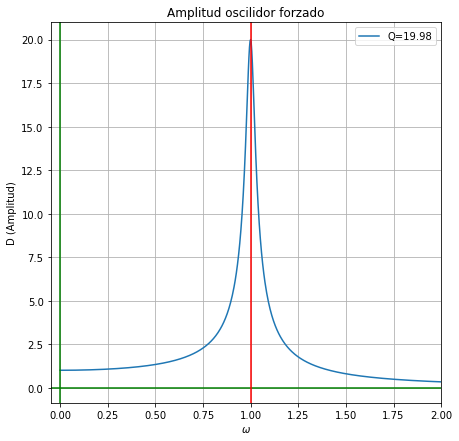

In [3]:
w=np.linspace(0,3,1000)
plt.figure(figsize=(7,7))
plt.plot(w, D(w, w0, a, m))
plt.legend(("Q=19.98","",""))
plt.axhline(0, color="g")
plt.axvline(0, color="g")
plt.axvline(1, color='r')
plt.xlim(-0.05, 2)
plt.xlabel("$\omega$")
plt.ylabel("D (Amplitud)")
plt.title("Amplitud oscilidor forzado")
plt.grid()
plt.show()

**b)** Graficar la fase de la solución como función de la freciencia de la fuerza externa.

La fase de la solución es la siguiente:

\begin{equation}
\delta=tan^{-1}\left(\frac{\omega\mu}{\omega_{0}^{2}-\omega^{2}}\right)
\end{equation}

In [4]:
# Fase de la fuerza externa
def delta(w0, m, w):
    return (np.arctan(np.divide( ((w) * m),(w0**2 - np.power((w),2)))+np.pi/2))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


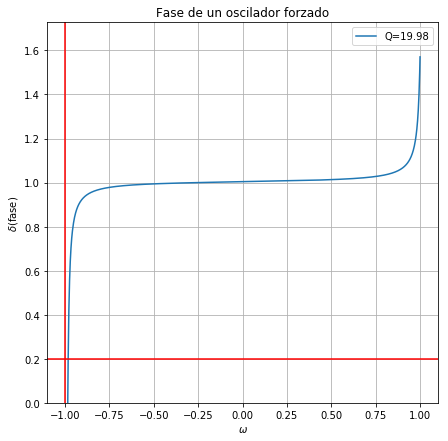

In [5]:
w=np.linspace(-1,1,1000)
plt.figure(figsize=(7,7))
plt.plot(w, delta(w0,m,w))
plt.xlabel('$\omega$')
plt.ylabel('$\delta$(fase)')
plt.legend(("Q=19.98", "", ""))
plt.ylim(0)
plt.axvline(-1, color="r")
plt.axhline(0.2, color="r")
plt.title("Fase de un oscilador forzado")
plt.grid()
plt.show()

**c)** Graficar el ángulo y la velocidad angular como función del tiempo para dos condiciones iniciales distintas.

Para los valores dados de  $\omega = 1$ y  $\mu = 0.05$, vemos que la desigualdad que se cumple es  $\omega_{0} > \frac{\mu}{2}$, por lo que el tipo de movimiento que nuestro sistema presenta será amortiguado.

Consideremos la solucion completa para el oscilador forzado. 

\begin{equation}
\theta_{c}(t)=A_{1}e^\frac{-t\mu}{2}cos({\omega_{1}{t}-\delta})
\end{equation}

donde 

\begin{equation}
\omega_{1}^{2}=\omega_{0}^{2}-\frac{\mu^{2}}{4}
\end{equation}

Junto con la solución particular:

\begin{equation}
\theta_{p}(t)=\frac{A_{2}cos(\omega{t}-\delta)}{\sqrt{(\omega_{0}^{2}-\omega^{2})^{2}+\omega^{2}\mu^{2}}}
\end{equation}

La solución completa será la suma de las dos soluciones anteriores:

\begin{equation}
\theta(t)=\theta_{p}(t)+\theta_{c}(t)
\end{equation}


**Primera condición** 
\begin{equation}
\theta(0)=-\frac{\pi}{20}\\    
\dot\theta(0)=-{\omega_{1}}
\end{equation}

Resolviendo para las condiciones iniciales anteriores y considerando las fases de la solución amortiguada y la solución particular **0**, la ecuación es la siguiente:

\begin{equation}
\theta(t)=\frac{2\omega_{1}}{\mu}e^{-\frac{\mu{t}}{2}}cos(\omega_{1}{t})+\left(-\frac{\pi}{20}-\frac{2\omega_{1}}{\mu}\right)cos(\omega{t})
\end{equation}

In [6]:
t=np.linspace(0,40,1000)
m=0.3
w0=-4
w1=sqrt(w0**2-(m/2)**2)

In [7]:
# Oscilador forzado primeras condiciones iniciales
a1=(2*w1)/m
a2=-(np.pi/20)-(2*w1)/m
wd1=2
def theta(a1, a2, m, w0, w1, wd1, t):
    return a1 * (np.exp((-m/2 * t)) * np.cos(w1 * t)) + (a2 * np.cos(wd1 * t))

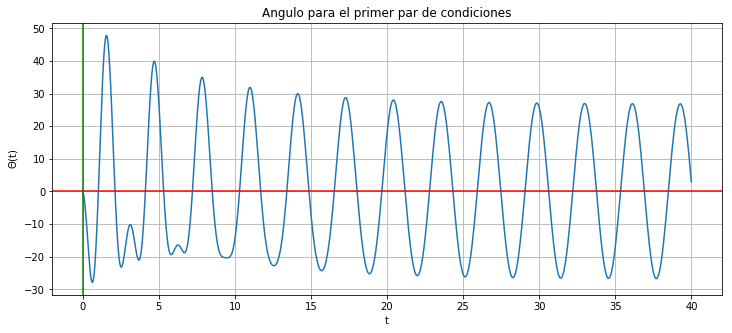

In [8]:
plt.figure(figsize=(12,5))
plt.plot(t, theta(a1, a2, m, w0, w1, wd1, t))
plt.axhline(0, color="r")
plt.axvline(0, color="g")
plt.xlabel("t")
plt.ylabel('$\Theta$(t)')
plt.title('Angulo para el primer par de condiciones')
plt.grid()
plt.show()

**Segunda condición**

\begin{equation}
\theta(0)=0\\
\dot\theta(0)=\frac{\omega_{1}}{20}
\end{equation}

Tomando las mismas consideraciones del caso anterior y aplicando las condiciones iniciales, la solución es la siguiente:

\begin{equation}
\theta(t)=-\frac{\omega_{1}}{10\mu}e^{-\frac{\mu{t}}{2}}cos({\omega_{1}{t}})+\frac{\omega{1}}{10\mu}cos(\omega{t})
\end{equation}

In [9]:
# Oscilador forzado segundas condiciones iniciales
b1=-w1/(10*m)
b2=w1/(10*m)
wd2=4
def theta1(b1, b2, m, w0, w1, wd2, t):
    return b1 * np.exp((-m/2 * t)) * np.cos(w1 * t) + b2 * np.cos(wd2 * t)


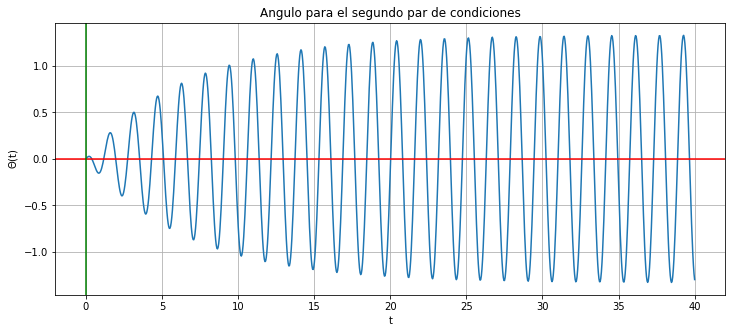

In [10]:
plt.figure(figsize=(12,5))
plt.plot(t, theta1(b1, b2, m, w0, w1, wd2, t))
plt.axhline(0, color="r")
plt.axvline(0, color="g")
plt.xlabel("t")
plt.ylabel('$\Theta$(t)')
plt.title('Angulo para el segundo par de condiciones')
plt.grid()
plt.show()

#### Nota: En la gráfica anterior podemos observar el fenómeno de resonancia.

Velocidad angular de la primera condición:

\begin{equation}
\dot\theta(t)=-\frac{2\omega_{1}}{\mu}e^{\frac{-\mu{t}}{2}}\left(\omega_{1}sen(\omega_{1}{t})+\frac{\mu}{2}cos(\omega_{1}{t})\right)+{\omega}\left(\frac{\pi}{20}+\frac{2\omega_{1}}{\mu}\right)sen(\omega{t})
\end{equation}

In [11]:
# Velocidad angular primeras condiciones iniciales
def vtheta(a1, a2, m, w0, w1, wd1, t):
    return -a1 * np.exp(-m/2 * t) * (m/2 * np.cos(w1 * t) + w1 * np.sin(w1*t))-(wd1*a2)*np.sin(wd1*t)

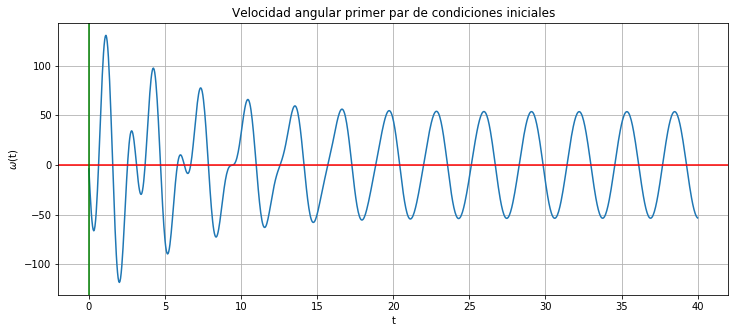

In [12]:
plt.figure(figsize=(12,5))
plt.plot(t, vtheta(a1, a2, m, w0, w1, wd1, t))
plt.xlabel("t")
plt.ylabel("$\omega$(t)")
plt.axhline(0, color="r")
plt.axvline(0, color="g")
plt.title('Velocidad angular primer par de condiciones iniciales')
plt.grid()
plt.show()

Velocidad angular con las segundas condiciones dadas:

\begin{equation}
\dot\theta(t)=\frac{\omega_{1}}{10\mu}e^{\frac{-\mu{t}}{2}}\left(\omega_{1}sen(\omega_{1}{t})+\frac{\mu}{2}cos(\omega_{1}{t})\right)-\frac{\omega_{1}\omega}{10\mu}sen(\omega{t})
\end{equation}

In [13]:
# Velocidad angular segundas condiciones iniciales
def vtheta1(b1, b2, m, w0, w1, wd2, t):
    return -b1 * np.exp(-m/2 * t) * (m/2 * np.cos(w1 * t) + w1 * np.sin(w1*t))-(wd2*b2)*np.sin(wd2*t)

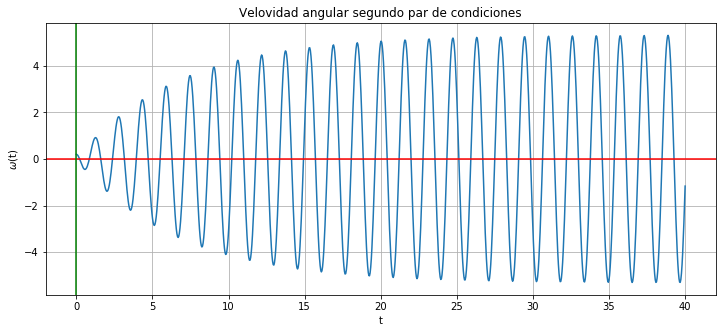

In [14]:
plt.figure(figsize=(12,5))
plt.plot(t, vtheta1(b1, b2, m, w0, w1, wd2, t))
plt.xlabel("t")
plt.ylabel("$\omega$(t)")
plt.axhline(0, color="r")
plt.axvline(0, color="g")
plt.title('Velovidad angular segundo par de condiciones')
plt.grid()
plt.show()

**d)** Graficar en el espacio fase las dos trayectorias con condiciones iniciales distintas del inciso anterior.

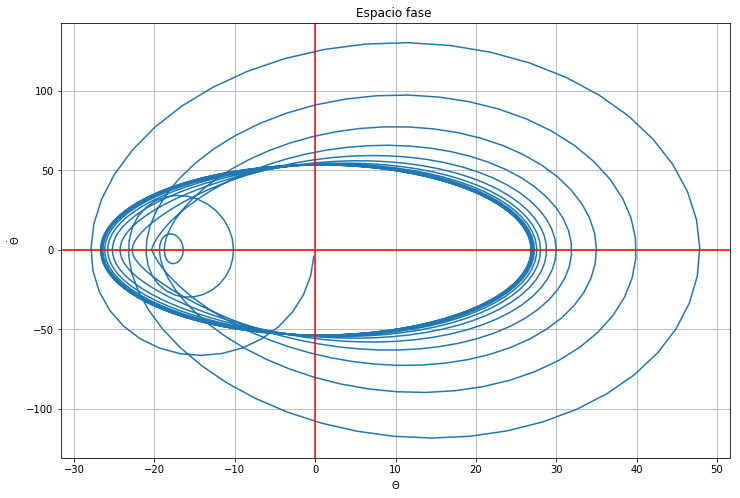

In [15]:
plt.figure(figsize=(4,6))
plt.figure(figsize=(12,8))
plt.plot(theta(a1,a2,m,w0,w1,wd1,t), vtheta(a1,a2,m,w0,w1,wd1,t))
plt.axvline(0, color='r')
plt.axhline(0, color='r')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.title("Espacio fase ")
plt.grid()
plt.show()

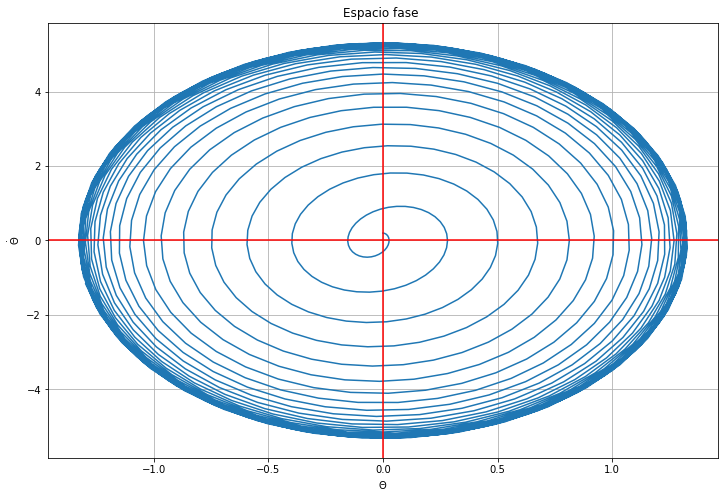

In [16]:
plt.figure(figsize=(4,6))
plt.figure(figsize=(12,8))
plt.plot(theta1(b1,b2,m,w0,w1,wd2,t), vtheta1(b1,b2,m,w0,w1,wd2,t))
plt.axvline(0, color='r')
plt.axhline(0, color='r')
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.title("Espacio fase ")
plt.grid()
plt.show()

**e)** Graficar en el espacio fase dos trayectorias con dos A's distintas, con $\mu$=0 y la misma condición inicial.

Tomando el límite lineal, la solución a la ecuación lineal forzada será la solución particular:

\begin{equation}
\theta_{p}(t)=\frac{A_{2}cos(\omega{t}-\delta)}{\sqrt{(\omega_{0}^{2}-\omega^{2})^{2}+\omega^{2}\mu^{2}}}
\end{equation}


In [17]:
# Solucion particular 
w0=1
w=0.5
m=0
def funp(a, w, w0, m, t):
    return np.divide(a*np.cos(w*t), sqrt((w0**2-w**2)**2)+(w*m)**2)

# Primera derivada solucion particular
def dfunp(a, w, w0, m, t):
    return -np.divide(a*np.sin(w*t), sqrt((w0**2-w**2)**2)+(w*m)**2)

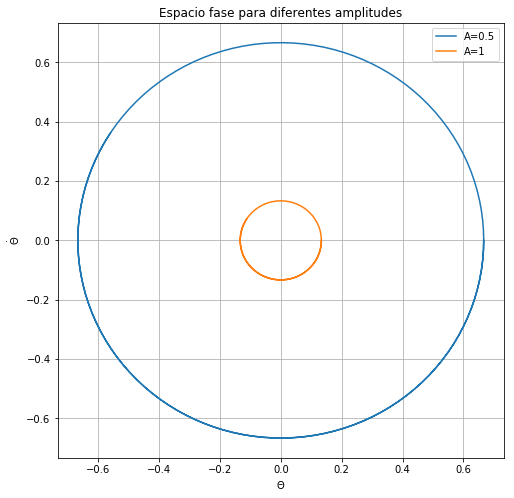

In [18]:
plt.figure(figsize=(8,8))
t=np.linspace(0,20,200)
plt.plot(funp(0.5, w, w0, m, t),dfunp(0.5, w, w0, m, t))
plt.plot(funp(0.1, w, w0, m, t),dfunp(0.1, w, w0, m, t))
plt.legend(("A=0.5", "A=1"))
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.title('Espacio fase para diferentes amplitudes')
plt.grid()
plt.show()

**f)** Graficar el espacio fase para trayectorias con $\mu$=0, 0.2, 0.1, considerando la misma amplitud *A=1*.

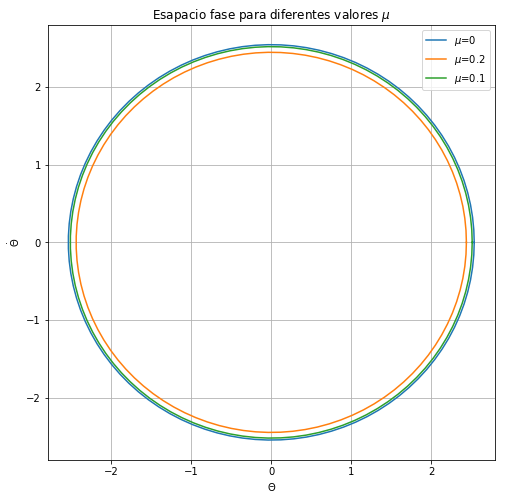

In [19]:
plt.figure(figsize=(8,8))
t=np.linspace(0,10,100)
a=1
w=np.pi/5
w0=np.pi/100
plt.plot(funp(a, w, w0, 0, t),dfunp(a, w, w0, 0, t))
plt.plot(funp(a, w, w0, 0.2, t),dfunp(a, w, w0, 0.2, t))
plt.plot(funp(a, w, w0, 0.1, t),dfunp(a, w, w0, 0.1, t))
plt.legend(('$\mu$=0','$\mu$=0.2','$\mu$=0.1'))
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.title('Esapacio fase para diferentes valores $\mu$')
plt.grid()
plt.show()

### 2.- Ecuación no lineal no forzada sin amortiguamiento


**a)** Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solución numérica del ángulo y su velocidad con la ecuación lineal usando las mismas condiciones iniciales.

Las ecuaciones que dan las soluciones que vamos a comparar son las siguientes:

*Ecuación lineal:*

\begin{equation}
\ddot\theta+\omega_{0}^{2}\theta=0
\end{equation}

*Ecuación no lineal:*

\begin{equation}
\ddot\theta+\omega_{0}^{2}sin(\theta)=0
\end{equation}

In [20]:
# Ecuacion lineal
def thh(w0, c, t):
    return c * np.cos(w0 * t)
def dthh(w0, c, t):
    return -c*w0*np.sin(w0*t)
w0=1
c=np.deg2rad(70)

In [21]:
# Ecuacion no lineal
def hfun(y, t):
    theta, omega = y
    dydt = [omega, -np.sin(theta)]
    return dydt
 
y0 = [np.deg2rad(70), 0]
t=np.linspace(0,10, 1000)
sol=odeint(hfun, y0, t)

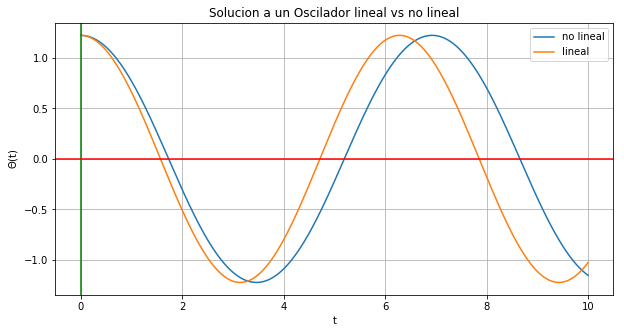

In [22]:
plt.figure(figsize=(10,5))
plt.plot(t, sol[:,0])
plt.plot(t, thh(w0, c, t))
plt.axvline(0, color="g")
plt.axhline(0, color="r")
plt.xlabel("t")
plt.ylabel("$\Theta$(t)")
plt.legend(("no lineal", "lineal"))
plt.title('Solucion a un Oscilador lineal vs no lineal')
plt.grid()
plt.show()

Comparando las velocidades:

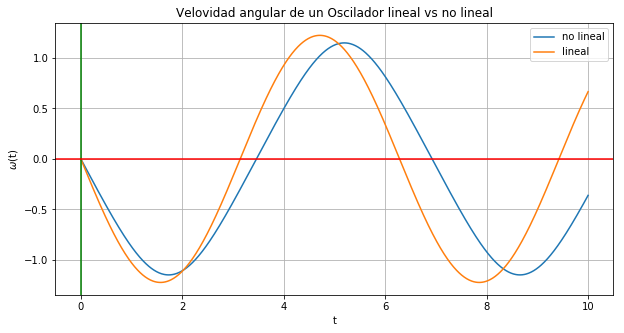

In [23]:
plt.figure(figsize=(10,5))
plt.plot(t, sol[:,1])
plt.plot(t, dthh(w0, c, t))
plt.axvline(0, color="g")
plt.axhline(0, color="r")
plt.xlabel("t")
plt.ylabel("$\omega$(t)")
plt.legend(("no lineal", "lineal"))
plt.title('Velovidad angular de un Oscilador lineal vs no lineal')
plt.grid()
plt.show()

**b)** Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial de -90 a 90 grados, en un intervalo de 10 grados.

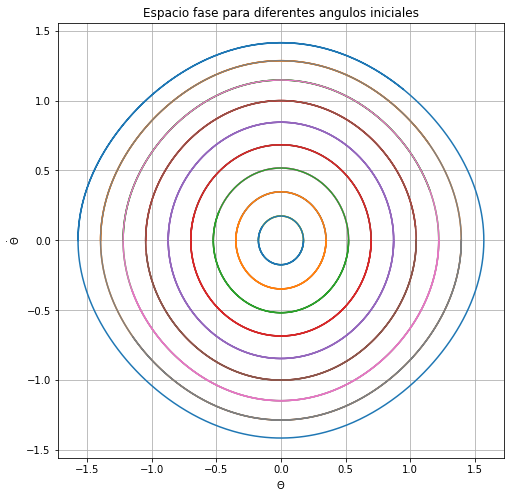

In [24]:
# Ecuacion no lineal 
def hfun(y, t):
    theta, omega = y
    dydt = [omega, -np.sin(theta)]
    return dydt

plt.figure(figsize=(8,8))
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.title('Espacio fase para diferentes angulos iniciales')
i=0
for i in range(-90,90,10): 
    y0 = [np.deg2rad(i), 0]
    t=np.linspace(0,10, 1000)
    sol=odeint(hfun, y0, t)
    plt.plot(sol[:,0], sol[:,1])    
plt.grid()
plt.show()
    

Sumar dos trayectorias que den vuelta una en contra de las manecillas del reloj y una a favor.

**Trayectoria parametrizada** en el espacio fase en sentido anti horario:
\begin{equation}
x(\theta)=\left(\frac{\theta}{10}+1\right)cos(2\theta)\\
y(\theta)=\left(\frac{\theta}{10}+1\right)sen(2\theta)
\end{equation}

**Trayectoria parametrizada** en sentido horario:
\begin{equation}
x(\theta)=\left(\frac{\theta}{10}+1\right)cos(2\theta)\\
y(\theta)=-\left(\frac{\theta}{10}+1\right)sen(2\theta)
\end{equation}

In [25]:
# Trayectoria parametrica antihoraria
x=np.linspace(0,1000,1000)
def xpar(x):
    return ((x/10)+1)*np.cos(2*x)
def ypar(x):
    return ((x/10)+1)*np.sin(2*x)

# Trayectoria parametrica horaria
def parmx(x):
    return ((x/10)+1)*np.cos(2*x)
def parmy(x):
    return -((x/10)+1)*np.sin(2*x)

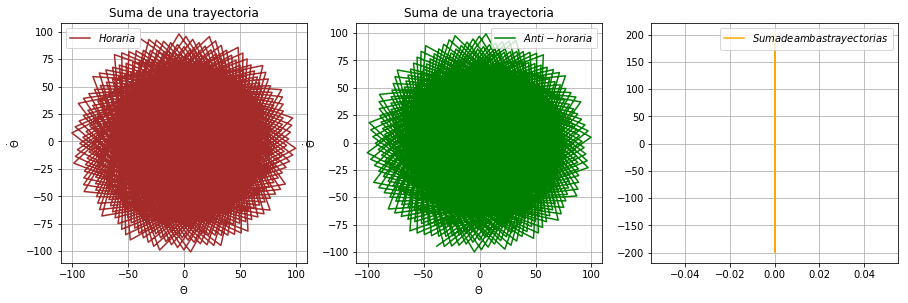

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.plot(xpar(x)+sol[:,0],ypar(x)+sol[:,1], color='brown', label='$Horaria$')
plt.title('Suma de una trayectoria')
plt.legend()
plt.grid()
plt.subplot(3,3,2)
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
plt.plot(parmx(x)+sol[:,0], parmy(x)+sol[:,1], color='g', label='$Anti-horaria$')
plt.title('Suma de una trayectoria')
plt.legend()
plt.grid()
plt.subplot(3,3,3)
plt.plot(ypar(x)+parmy(x), xpar(x)+parmx(x), label='$Suma de ambas trayectorias$', color='orange')
plt.title('')
plt.legend()
plt.grid()

### 3.-Ecuación no lineal amortiguada no forzada

**a)** Utiliza un parámetro amortiguado de 0.02, frecuencia natural unitaria y observa cómo el espacio fase se distorsiona. 

Ecuación no lineal para un oscilador amortiguado:

\begin{equation}
\ddot\theta(t)+\mu\dot\theta(t)+\omega_{0}^{2}sin(\theta)=0
\end{equation}

Ecuación lineal para un pédulo amortiguado:

\begin{equation}
\ddot\theta(t)+\mu\dot\theta(t)+\omega_{0}^{2}\theta(t)=0
\end{equation}

In [27]:
#Ecuacion lineal amortiguada
w0=1
m=0.02
a=np.deg2rad(90)
def funw1(w0, m):
    return sqrt(w0**2-(m/2)**2)
w1=funw1(w0, m)

def athh(a, w1, m, t):
    return a*np.exp(-m*t/2)*np.cos(w1*t)

In [28]:
#Ecuacion no lineal amortiguada
def afun(y, t, w0, m):
    theta, omega = y
    dydt = [omega, -w0**2*np.sin(theta)-m*omega]
    return dydt

y0 = [np.deg2rad(90), 0]
t=np.linspace(0,80, 1000)
sol1=odeint(afun, y0, t, args=(w0, m))

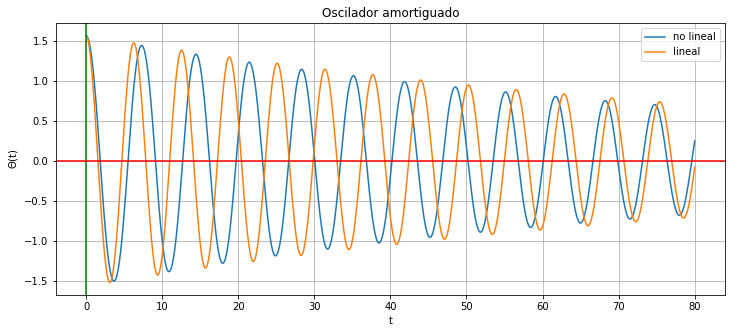

In [29]:
plt.figure(figsize=(12,5))
plt.plot(t, sol1[:,0])
plt.plot(t, athh(a, w1, m, t))
plt.axvline(0, color="g")
plt.axhline(0, color="r")
plt.xlabel("t")
plt.ylabel("$\Theta$(t)")
plt.legend(("no lineal", "lineal"))
plt.title('Oscilador amortiguado')
plt.grid()
plt.show()

**b)** Compara cada trayectoria en el espacio fase en el caso no amortiguado y amortiguado para trayectorias que van de -90 a 90 grados en intervalos de 10 grados.

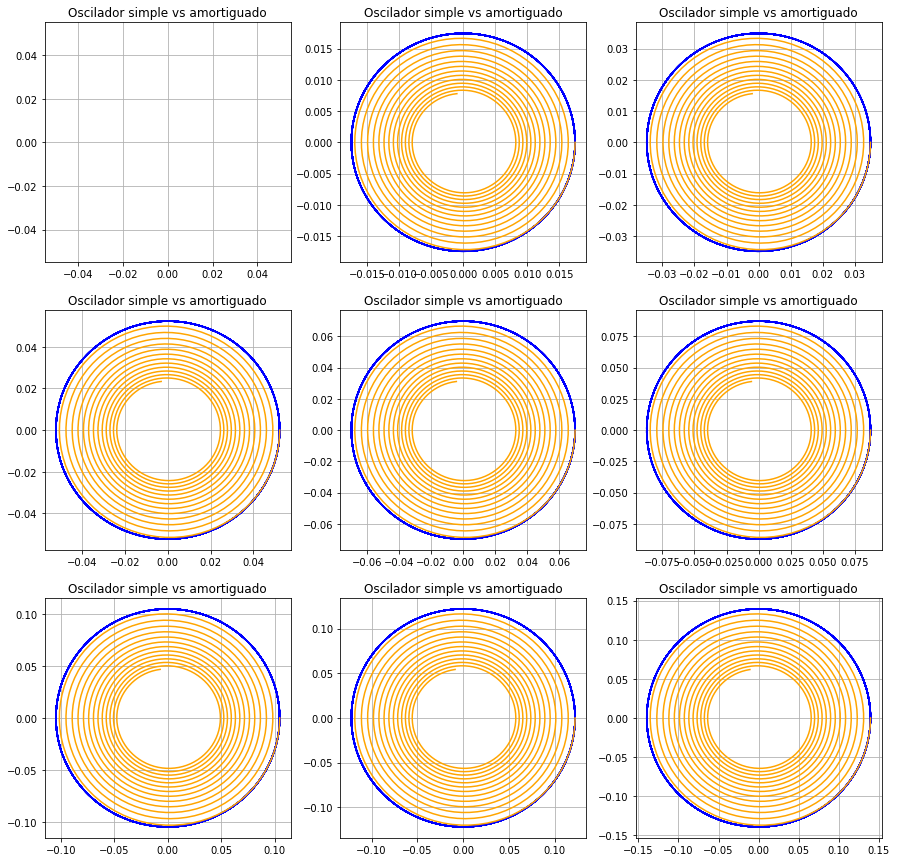

In [30]:
w0=1
m=0.02
def afun(y, t, w0, m):
    theta, omega = y
    dydt = [omega, -w0**2*np.sin(theta)-m*omega]
    return dydt
plt.figure(figsize=(15,15))
plt.xlabel('$\Theta$')
plt.ylabel('$\dot\Theta$')
i=0
for i in range(9):
    y0 = [np.deg2rad(i), 0]
    t=np.linspace(0,80, 1000)
    plt.subplot(3,3,i+1)
    sol=odeint(hfun, y0, t)
    plt.plot(sol[:,0], sol[:,1], color='b')
    sol1=odeint(afun, y0, t, args=(w0, m))
    plt.plot(sol1[:,0], sol1[:,1], color='orange')
    plt.title('Oscilador simple vs amortiguado')
    plt.grid()
plt.show()

### 4.-Ecuación no lineal completa.

\begin{equation}
\ddot\theta(t)+\mu\dot\theta(t)+\omega_{0}^{2}sin(\theta)=Acos(\omega_{d}{t})
\end{equation}

**a)** Usando $\mu$=$\frac{3\pi}{2}$, $\omega$=$2\pi$, $\omega_{0}$=$3\pi$, graficar la solución para 5 casos de **A** alrededor de 1.05. ¿Qué le sucede a las soluciones? Probar para el caso A = 2.

In [31]:
m=(3/2)*np.pi
w=2*np.pi
w0=3*np.pi
a=1

def ffun(y, t, w0, w, m, a):
    theta, omega = y
    dydt = [omega, -w0**2*np.sin(theta)-m*omega+a*np.cos(w*t)]
    return dydt

y0 = [np.deg2rad(15), 0]
t=np.linspace(0,2, 300)
sol2=odeint(ffun, y0, t, args=(w0, w, m, 1))
sol3=odeint(ffun, y0, t, args=(w0, w, m, 1.5))
sol4=odeint(ffun, y0, t, args=(w0, w, m, 0.8))
sol5=odeint(ffun, y0, t, args=(w0, w, m, 0.5))
sol6=odeint(ffun, y0, t, args=(w0, w, m, 1.9))
sol7=odeint(ffun, y0, t, args=(w0, w, m, 2))

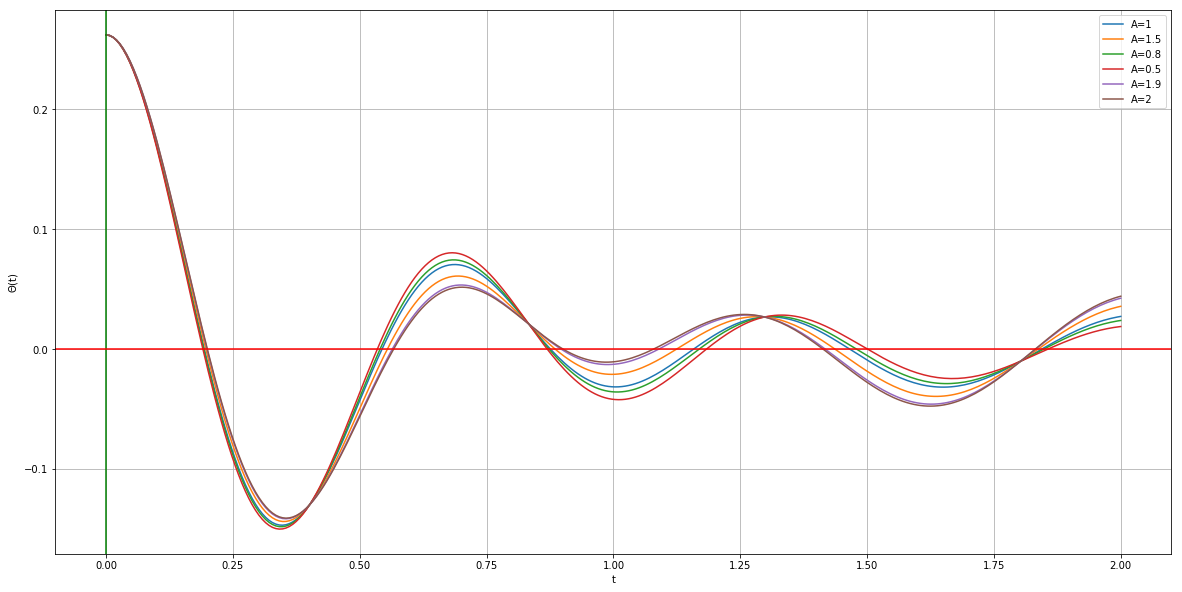

In [32]:
plt.figure(figsize=(20,10))
plt.plot(t, sol2[:,0])
plt.plot(t, sol3[:,0])
plt.plot(t, sol4[:,0])
plt.plot(t, sol5[:,0])
plt.plot(t, sol6[:,0])
plt.plot(t, sol7[:,0])
plt.legend(("A=1", "A=1.5", "A=0.8", "A=0.5", "A=1.9", "A=2"))
plt.axvline(0, color="g")
plt.axhline(0, color="r")
plt.xlabel("t")
plt.ylabel("$\Theta$(t)")
plt.grid()
plt.show()

**b)** Construir el espacio face para cada una de las trayectorias anteriores.

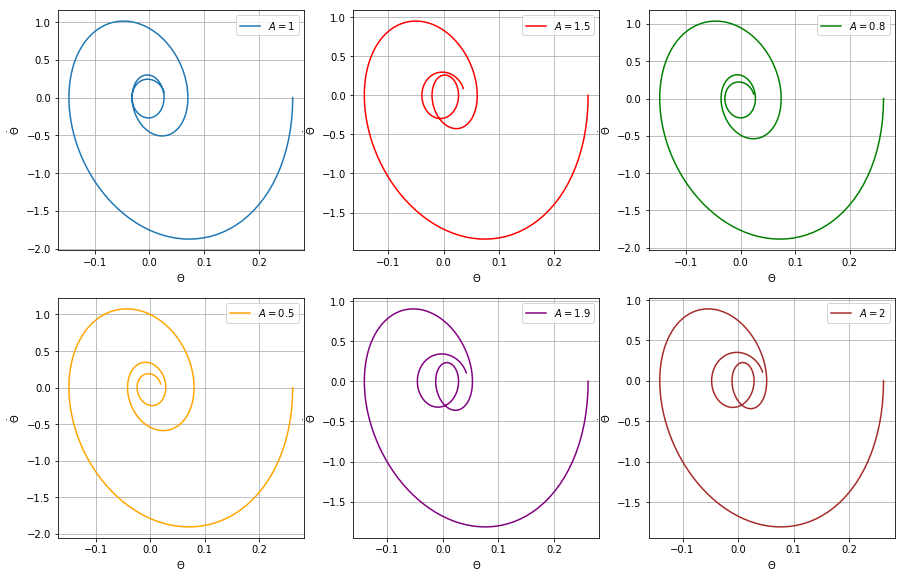

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol2[:,0], sol2[:,1], label ='$A=1$')
plt.grid()
plt.legend()
plt.subplot(3,3,2)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol3[:,0], sol3[:,1], color='r', label = '$A=1.5$')
plt.grid()
plt.legend()
plt.subplot(3,3,3)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol4[:,0], sol4[:,1], color='g', label='$A=0.8$')
plt.grid()
plt.legend()
plt.subplot(3,3,4)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol5[:,0], sol5[:,1], color='orange', label='$A=0.5$')
plt.grid()
plt.legend()
plt.subplot(3,3,5)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol6[:,0], sol6[:,1], color='purple', label ='$A=1.9$')
plt.grid()
plt.legend()
plt.subplot(3,3,6)
plt.ylabel('$\dot\Theta$')
plt.xlabel('$\Theta$')
plt.plot(sol7[:,0], sol7[:,1], color='brown',label='$A=2$')
plt.grid()
plt.legend()